In [ ]:
import numpy as np
import pandas as pd
import geopandas

import matplotlib.pyplot as plt

## Station locations - Figure A1

In [ ]:
ids = np.load('/data/station-ids.npy', allow_pickle = True)
years = np.load('/data/years.npy')

In [ ]:
station_locDF = pd.read_csv('/data/stations.csv')

In [ ]:
station_locDF['id_active'] = 'no'
station_locDF['years'] = 0
for j in range(ids.shape[0]):
        k = np.where(station_locDF.id == int(ids[j]))[0][0]
        if years[j] > 9: station_locDF.loc[k,'id_active'] = 'yes' # filter for stations with at least 10 years of data 

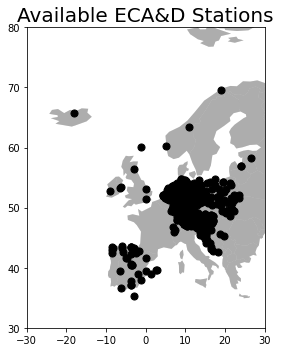

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
eu = world[world['continent'] == "Europe"]

geo_df=geopandas.GeoDataFrame(station_locDF,crs=crs,geometry=geopandas.points_from_xy(station_locDF['lon'], station_locDF['lat']))

fig,ax=plt.subplots(1,1, figsize=(5,5))
eu.plot(ax=ax,alpha=0.4,color="grey")
eu.plot(ax=ax,alpha=0.4,color="grey")

geo_df[(geo_df['id_active']=="yes")].plot(column = 'years',ax=ax,markersize=50, color = 'black', legend = True, vmin = 0, vmax = 20)

ax.set_xlim(-30,30)
ax.set_ylim(30,80)
ax.set_title('Available ECA&D Stations', fontsize = 20)


plt.tight_layout()
plt.savefig('',bbox_inches='tight')

## Time series - Figure A2

In [ ]:
stn = np.load('/data/stacked-01-21-std.npy', allow_pickle = True)
dS = np.array([stn[i,:,:] for i in range(5)])
d = {i: dS[:,i,:].transpose() for i in range(8210)}
dataframeOBS = pp.DataFrame(d, analysis_mode = 'multiple', var_names = var_names)

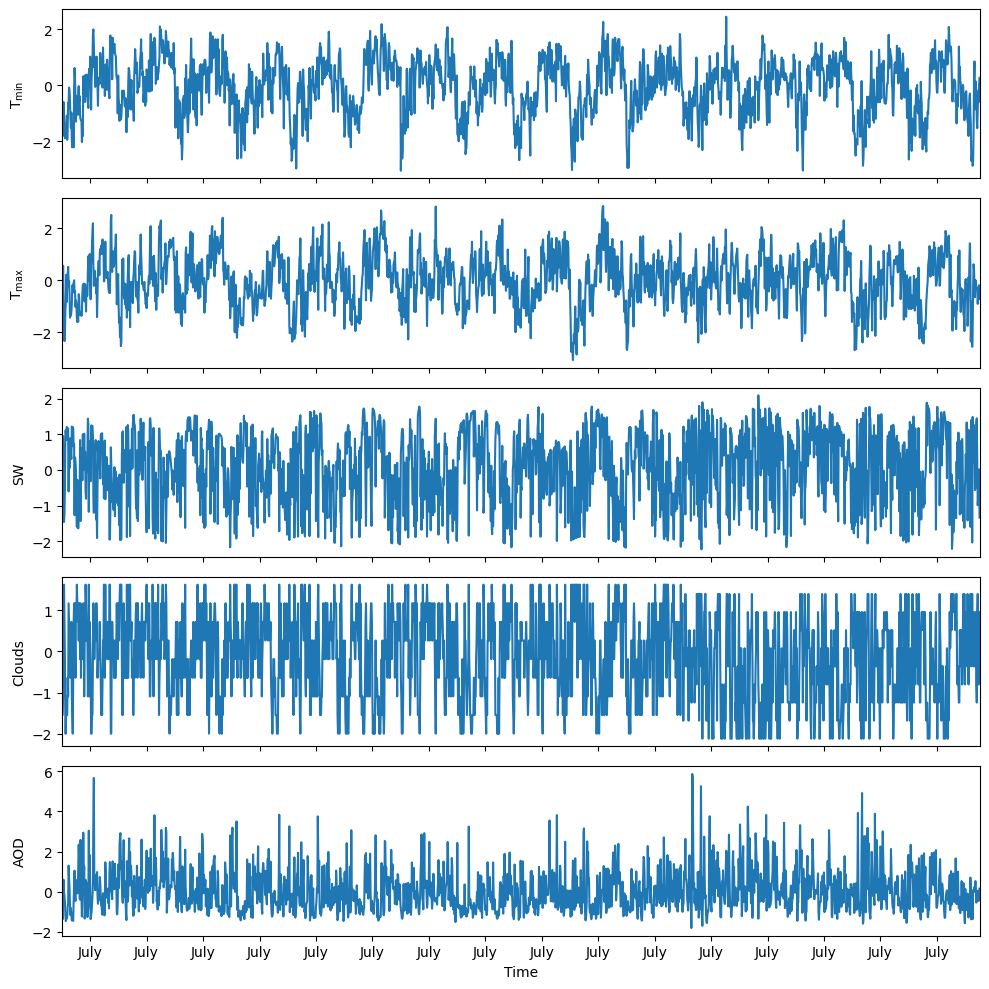

In [ ]:
# Create 5 subplots
fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axlabels = [r'T$_{\text{min}}$', r'T$_{\text{max}}$', r'SW', r'Clouds', r'AOD']

# Plot each time series in a separate subplot
for i in range(5):
    axs[i].plot(stn.reshape((5,1009830))[i,:2000])
    # axs[i].set_ylabel(var_names[i])
    axs[i].set_xticks(np.arange(0, 2000-61, 123)+61)
    axs[i].set_xticklabels(np.repeat('July',16))
    axs[i].set_ylabel(axlabels[i])
    axs[i].set_xlim(0, 2000)
axs[4].set_xlabel('Time')


# Display the plot
plt.tight_layout()

## Density plot - Figure A3

/scratch/s2135337/miniconda/base/envs/ci-march/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/s2135337/miniconda/base/envs/ci-march/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/s2135337/miniconda/base/envs/ci-march/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/s2135337/miniconda/base/envs/ci-march/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: F

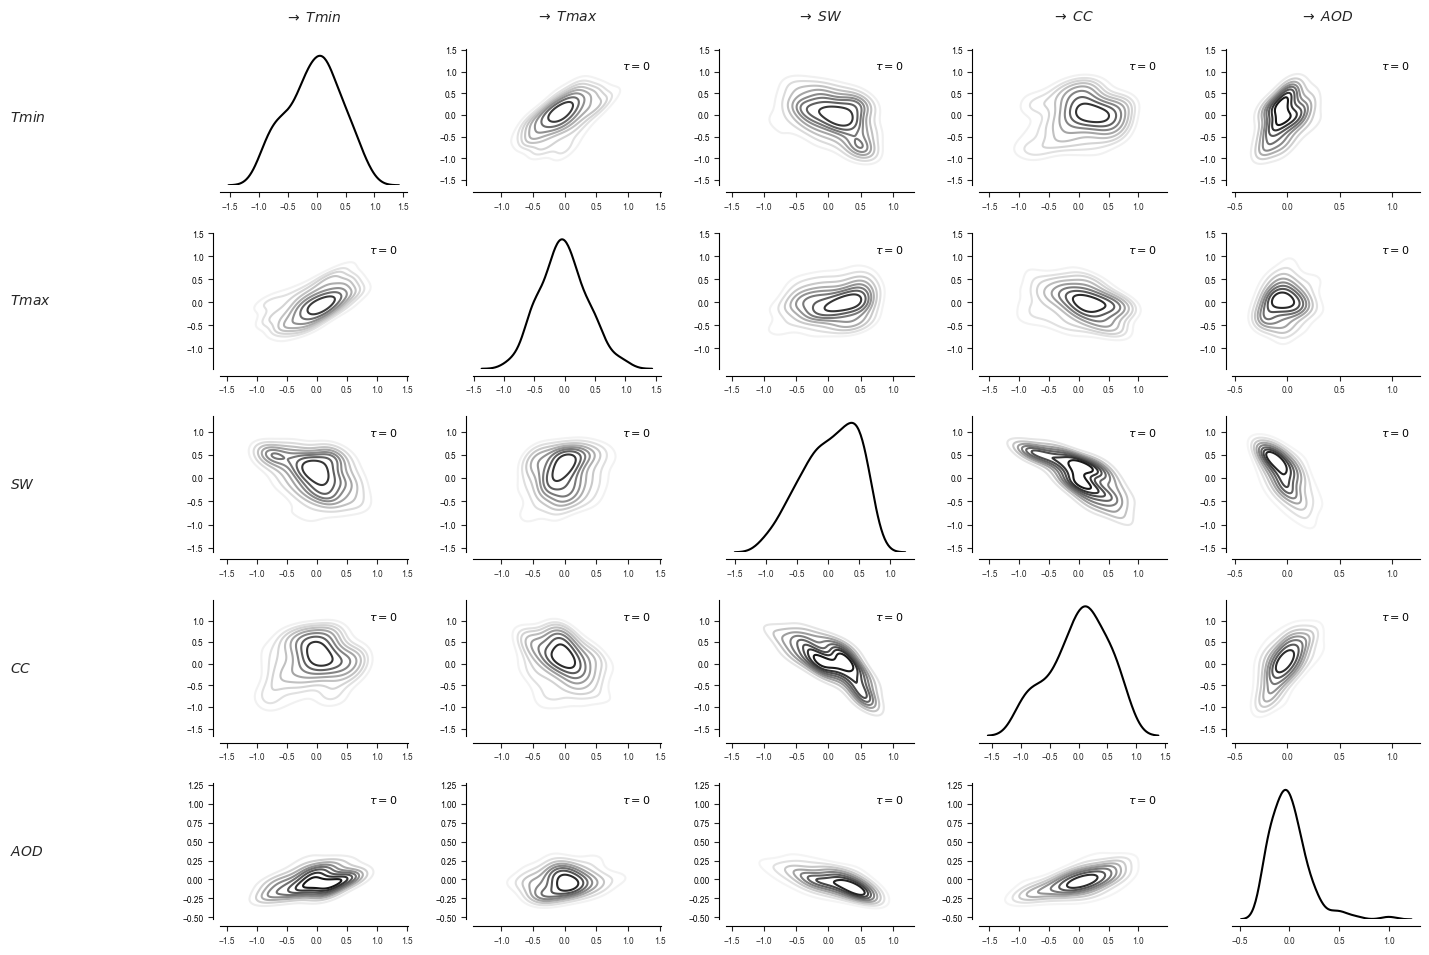

<Figure size 640x480 with 0 Axes>

In [ ]:
tp.plot_densityplots(dataframe=dataframeOBS, setup_args={'figsize':(15, 10)}); 

## plot LW theory - Figure A4

In [ ]:
var_names = [r'$Tmin$', r'$Tmax$', r'$SW$', r'$CC$', r'$AOD$']

graph1 = np.array([[['', '-->'], #tmin
                    ['-->', '<--'],
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['', '']],
                   [['<--', ''], #tmax
                    ['', '-->'],
                    ['<--', ''],
                    ['<--', ''],
                    ['', ''],
                    ['', '']],
                   [['', ''], #SW
                    ['-->', ''],
                    ['', '-->'],
                    ['<--', ''],
                    ['<--', ''],
                    ['', '']],
                   [['', ''], # CC
                    ['-->', ''],
                    ['-->', ''],
                    ['', '-->'],
                    ['<--', ''],
                    ['', '']],
                   [['', ''], #AOD
                    ['', ''],
                    ['-->', ''],
                    ['-->', ''],
                    ['', '-->'],
                    ['', '']],
                  [['', ''], #LW
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['', '']]], dtype='<U3')

graph2 =  np.array([[['', ''], #tmin
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['<--', '']],
                   [['', ''], #tmax
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['', '']],
                   [['', ''], #SW
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['', '']],
                   [['', ''], # CC
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['-->', '']],
                   [['', ''], #AOD
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['', ''],
                    ['-->', '']],
                  [['-->', ''], #LW
                    ['', ''],
                    ['', ''],
                    ['<--', ''],
                    ['<--', ''],
                    ['', '-->']]], dtype='<U3')

In [ ]:
tp.plot_graph(graph = graph1, #save_name='/home/s2135337/carla/paper2/theory-not-discovered.png',
        var_names=[r'T$_{\text{min}}$',r'T$_{\text{max}}$','SW','Clouds','AOD','LW'], node_pos = {'x':[0,1,3,4,2,0],'y':[2,0,0,2,4,4]},node_aspect = 0.8, node_size = 0.8, standard_color_links = 'black') 

plt.savefig('...', dpi = 300, transparent = True)


In [ ]:

tp.plot_graph(graph = graph2, #save_name='/home/s2135337/carla/paper2/theory-not-discovered.png',
        var_names=[r'T$_{\text{min}}$',r'T$_{\text{max}}$','SW','Clouds','AOD','LW'], node_pos = {'x':[0,1,3,4,2,0],'y':[2,0,0,2,4,4]},node_aspect = 0.8, node_size = 0.8, standard_color_links = 'tab:purple') 

plt.savefig('...', dpi = 300, transparent = True)